# **Elective 3**

# Iris Classification
### Sunmitted by: Abdallah Fekry Mohammed
### Submitted to: Dr. Omaima Goher
---

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from time import process_time

In [4]:
ds = pd.read_csv("/kaggle/input/iris/Iris.csv")
ds.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
labels = sorted(ds.Species.unique())
labels

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [15]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [16]:
ds.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [17]:
ds.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [19]:
x = ds.iloc[:,1:-1].values
y = ds.iloc[:,-1].astype('category').cat.codes.values
print("x shape:",x.shape,"\ny shape:",y.shape)

x shape: (150, 4) 
y shape: (150,)


In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y ,train_size=0.8,
                                                    random_state=13)
print("x train shape:",x_train.shape,"\ny train shape:",y_train.shape,
      "\nx test shape:",x_test.shape,"\ny test shape:",y_test.shape)

x train shape: (120, 4) 
y train shape: (120,) 
x test shape: (30, 4) 
y test shape: (30,)


# **1) Logistic Regression**

In [48]:
# 1 Logistic Regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
st = process_time()
model.fit(x_train , y_train)
end = process_time()
t1 = end-st
yp = model.predict(x_test)
score1 = accuracy_score(y_test,yp)
print("By using Logistic Regression\n\n",
      "Test Accuracy: ",round(score1*100,2),' %',
      "\nfitting time: ",round(t1,4),' second'
      "\n\nConfusion Matrix\n",confusion_matrix(y_test,yp), sep='')

By using Logistic Regression

Test Accuracy: 96.67 %
fitting time: 0.0219 second

Confusion Matrix
[[ 9  0  0]
 [ 0  8  0]
 [ 0  1 12]]


### Heatmap

<Axes: title={'center': 'Logistic Regression Heatmap'}, xlabel='Predicted', ylabel='Actual'>

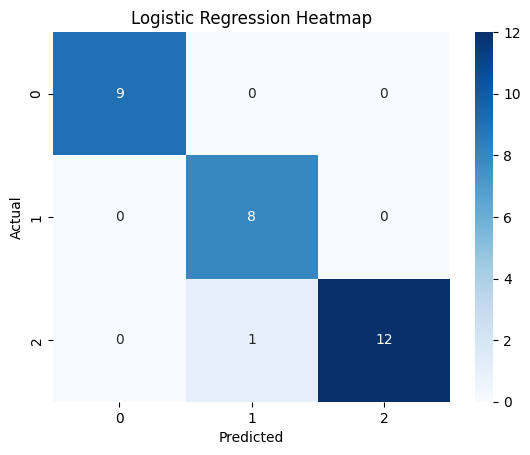

In [36]:
fig = plt.figure()
plt.title("Logistic Regression Heatmap")
m = pd.crosstab(y_test, yp, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(m,annot=True, cmap="Blues")

# **2) Support Vector Machine SVM**

In [49]:
# 2 Support Vector Machine SVM
from sklearn import svm
model = svm.SVC()
st = process_time()
model.fit(x_train , y_train)
end = process_time()
t2 = end-st
yp = model.predict(x_test)
score2 = accuracy_score(y_test,yp)
print("By using Support Vector Machine SVM\n\n",
      "Accuracy: ",round(score2*100,2),' %',
      "\nfitting time: ",round(t2,4),' second'
      "\n\nConfusion Matrix\n",confusion_matrix(y_test,yp), sep='')

By using Support Vector Machine SVM

Accuracy: 100.0 %
fitting time: 0.0042 second

Confusion Matrix
[[ 9  0  0]
 [ 0  8  0]
 [ 0  0 13]]


### Heatmap

<Axes: title={'center': 'SVM Heatmap'}, xlabel='Predicted', ylabel='Actual'>

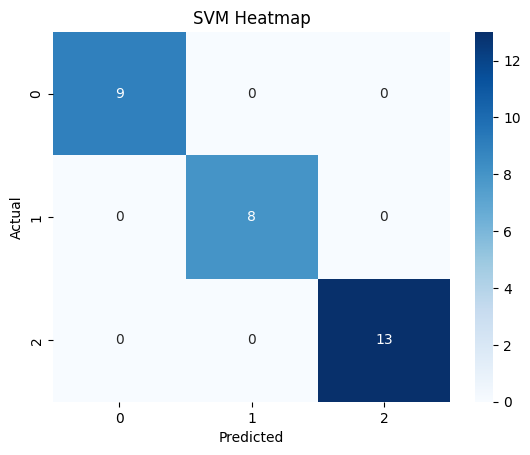

In [51]:
fig = plt.figure()
plt.title("SVM Heatmap")
m = pd.crosstab(y_test, yp, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(m,annot=True, cmap="Blues")

### Classification Report

In [41]:
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



---

## Random Running from X test

In [77]:
import random
n = random.randint(0,len(x_test)-1)
x1 = x_test[n]
yt = y_test[n]
p1 = model.predict(x1.reshape(1,-1))[0]
p2 = types[p1]
print(f"-> at index number {n}\n\n",
      f"- Actual value: {yt}\n",
      f"- Predicted value: {p1}, {p2}", sep='', end='\n\n')


-> at index number 4

- Actual value: 2
- Predicted value: 2, Iris-virginica

